# Regressão Logística usando Softmax no Keras - Iris dataset

Este notebook reproduz o exemplo de Regressão Logística usando Softmax,
já feito utilizando programação matricial. 
Neste notebook utiliza-se o Keras, utilizando o mesmo modelo e mesmos parâmetros.

Os objetivos desta experiência são:
* Primeiros passos na utilização do Keras
    * criação rede densa de uma camada e ativação Softmax
    * compilação para preparação treinamento
    * treinamento
    * avaliação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD


Using Theano backend.


## Leitura, normalização e visualização dos dados


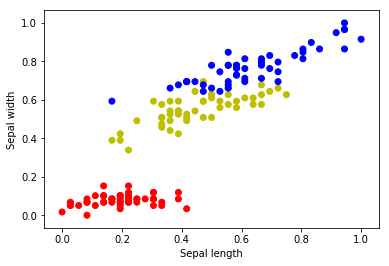

In [7]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Xc = X - X.min(axis=0)
Xc /= Xc.max(axis=0)

Y = iris.target

colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Convertendo rótulos na codificação 'one-hot' - categórico

In [8]:
Y_oh = np_utils.to_categorical(Y, 3) 
print Y[0:5]
print Y_oh[0:5]

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


## Construindo o modelo da rede

Para construirmos a rede equivalente da experiência da Regressão Logística, basta colocar
* uma rede neural densa (totalmente conectada), onde o 
* número de entradas são dois, pois são dois atributos e o 
* número de saídas é 3 (número de classes). 
* Utiliza-se o Softmax como camada de ativação e a
* inicialização dos pesos deve ser zero.

**Obs:** Em geral, a inicialização dos pesos em zero não é uma boa opção. Fui utilizado aqui apenas para comparação com as implementações matriciais anteriores.

In [34]:
output_dim = nb_classes = 3 
model = Sequential() 
model.add(Dense(20, input_dim=2, activation='tanh',init='glorot_normal')) 
model.add(Dense(output_dim, activation='softmax')) 
#model.add(Dense(output_dim, input_dim=2, activation='softmax',init='zero')) 


## Compilação do modelo

A compilação do modelo é a sua preparação para o treinamento. Quando se compila o modelo, deve-se escolher o método da otimização e a função de perda a ser minimizada.
Iremos utilizar o Gradiente Descendente, para isso escolhe-se o 
* SGD - Stochastic Gradient Descent e inicializa a 
* taxa de aprendizagem `lr`.

**Obs:** Observe que apesar de usarmos os SGD, este método se degrada no gradiente descendente, desde que o `batch_size` seja igual ao número total de amostras.

In [35]:
sgd = SGD(lr=0.15)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 

## Laço principal de treinamento da Regressão Logística por Softmax

O treinamento via gradiente descendente acontece na função `fit`. É preciso fornecer:
* Número de iterações, aqui denominado de `nb_epoch` e
* `batch_size` que é o número de amostras utilizado a cada iteração de atualização dos pesos pelo gradiente descendente.

In [36]:
batch_size = 150
nb_epoch = 10000
n = Xc.shape[0] # number of training examples
history = model.fit(Xc, Y_oh, batch_size=batch_size, nb_epoch=nb_epoch,verbose=0)

## Imprimindo perda e W finais

Observe que no Kera, o parâmetros são o W e o Bias, eles são separados. Nas implementaçõe anteriores por programação matricial, foi mais simples colocar a coluna de '1' no `X` para que o `W` já ficasse com o Bias. Observe abaixo que no Keras, o W tem shape: (2,3) e o Bias tem shape: (1,3)

In [37]:
loss = model.evaluate(Xc, Y_oh, verbose=0)
print 'Final loss:',loss

W = model.get_weights()
print 'Bias:\n', W[1]
print 'W:\n', W[0]

Final loss: 0.0787757874404
Bias:
[-1.17295063  0.54845655  0.59858245  0.16238648  1.18390477  0.38615662
  1.27282989 -0.10445468  0.16475293 -0.23476346  0.57247239  0.1852385
 -0.19327392  2.41513634  0.03107413  0.69341385  1.10413313 -0.84204447
  1.49006522 -1.24424767]
W:
[[-0.61492437  0.06173412 -0.45470983  0.2602658  -0.14148259  0.09331688
   0.42364779 -0.02480179 -0.3549664   0.16617708  0.02560317 -0.37016642
  -0.0088705   0.95917547 -0.55734539  0.17025225  0.3334384   0.79660308
   0.704539   -0.4004817 ]
 [ 2.54557323 -0.78509599  0.07052755 -1.73087275 -1.61964464 -1.94633877
  -2.42822552  1.00160897 -1.42437279 -0.22900295 -1.1598196  -1.22773337
  -0.39520955 -4.94350052 -1.06792724 -1.18408215 -2.01857805  3.14758706
  -3.32874751  2.62073612]]


## Visualizando a minimização da Perda durante o treinamento


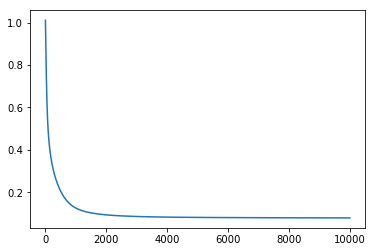

In [38]:
plt.plot(history.history['loss'])

## Cálculo do desempenho do resultado


In [39]:
Y_hat = model.predict_classes(Xc)

accuracy = np.sum(Y_hat == Y)/np.float(n)
print
print 'Acurácia: ', accuracy

print 'Matriz de confusão:'
import pandas as pd
pd.crosstab(Y_hat, Y)


 32/150 [=====>........................] - ETA: 0s
Acurácia:  0.966666666667
Matriz de confusão:


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,2
2,0,3,48


## Visualização das fronteiras de decisão no espaço de atributos

2944/3721 [======================>.......] - ETA: 0s

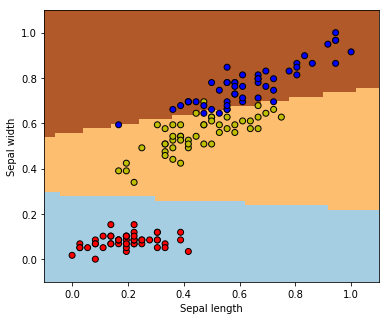

In [40]:
h = .02  # step size in the mesh
folga = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = Xc.min(axis=0) - folga, Xc.max(axis=0) + folga
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]
#X_grid = np.hstack([np.ones((X_grid.shape[0],1)),X_grid]) # incluído X00 como 1 para gerar bias no W

# Faz a predição para todas as amostras do espaço de atributos
Z = model.predict_classes(X_grid)

# Mostra o resultado da predição (0, 1 ou 2) no gráfico
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Mostra os pontos das amostras de treinamento
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Atividades

1. Compare os valores finais de perda e W com os valores obtidos na versão utilizando programação matricial. Os valores devem ser iguais.
2. O próximo notebook será igual a este, porém com a visualização simultânea da curva de perda e das fronteiras de decisão.

- Keras é OO
- Tem adição de camadas de neurônios
- Permite usar diferentes otimizadores